<a href="https://colab.research.google.com/github/VekhovIO/portfolio/blob/main/Razvedka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будем работать с датасетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Проведем разведочный анализ данных, чтобы исследовать поведение данных и выявить в них закономерности.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
RANDOM_STATE = 42

In [ ]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

In [ ]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
744,745,1,3,Stranden; Mr. Juho,male,31.0,0,0,STON/O 2. 3101288,7.925,NaN,S
238,239,0,2,Pengelly; Mr. Frederick William,male,19.0,0,0,28665,10.500,NaN,S
747,748,1,2,Sinkkonen; Miss. Anna,female,30.0,0,0,250648,13.000,NaN,S
234,235,0,2,Leyson; Mr. Robert William Norman,male,24.0,0,0,C.A. 29566,10.500,NaN,S
58,59,1,2,West; Miss. Constance Mirium,female,5.0,1,2,C.A. 34651,27.750,NaN,S


In [ ]:
Data.shape

(891, 12)

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

In [ ]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Data.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Dooley; Mr. Patrick,male,347082,G6,S
freq,1,574,7,4,644


В столбце пол (`Sex`) три различных значения.

In [ ]:
Data['Sex'].value_counts()

,count
Sex,
male,574
female,312
unknown,5


Удалим пассажиров неизвестного пола, так как их всего *5*.

In [ ]:
Data = Data[Data['Sex'] != 'unknown']
Data.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,886,886,886,204,884
unique,886,2,679,147,3
top,Dooley; Mr. Patrick,male,CA. 2343,G6,S
freq,1,574,7,4,641


Признак `Sex` является категориальным, то есть содержит нечисловые значения.

In [ ]:
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})

In [ ]:
sum(Data['Sex'])

574

Посмотрим, как влияет пол на выживаемость.

<ipython-input-15-c45fe20c581a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')


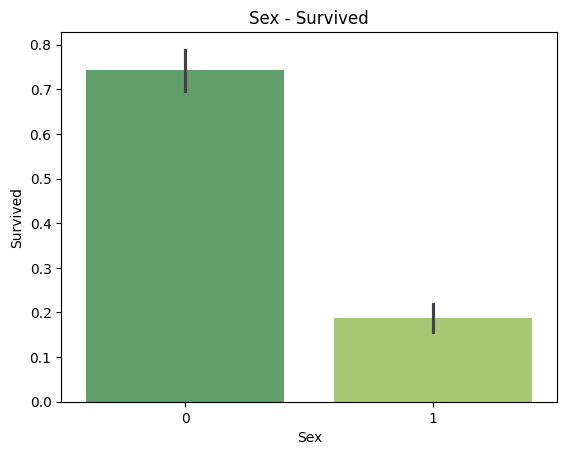

In [ ]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмма выживаемости в зависимости от `Pclass`.  

<ipython-input-16-d31f3da6cd1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=Data, palette='summer')


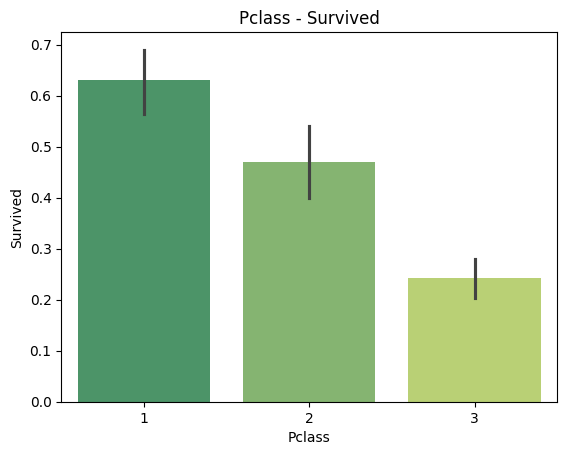

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=Data, palette='summer')
plt.title('Pclass - Survived')
plt.show();

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

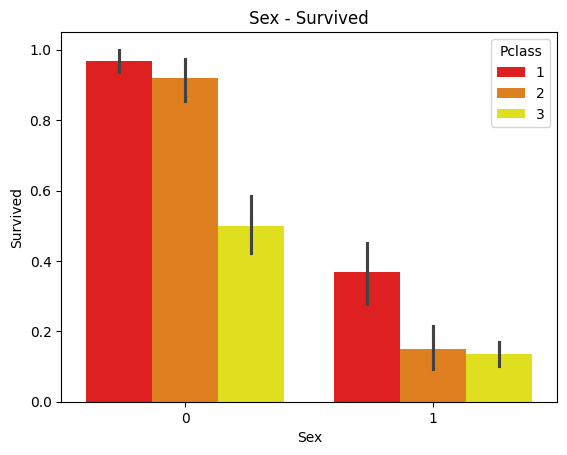

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

In [ ]:
Data['Embarked'].value_counts()

,count
Embarked,
S,641
C,168
Q,75


In [ ]:
Data.drop(columns = 'Embarked')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,1,27.0,0,0,211536,13.0000,NaN
887,888,1,1,Graham; Miss. Margaret Edith,0,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,Behr; Mr. Karl Howell,1,26.0,0,0,111369,30.0000,C148


Заполним пропуски медианным значением `Age`.

In [ ]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

<ipython-input-13-a6a754c7810e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Age'].fillna(median_age, inplace=True)


Нарисуем распределение возраста пассажиров.

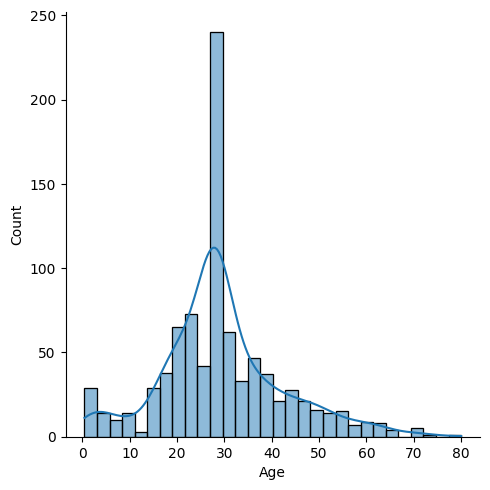

In [ ]:
sns.displot(Data['Age'], kde=True)
plt.show();

In [ ]:
Data.drop(columns = 'Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,1,27.0,0,0,211536,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,0,19.0,0,0,112053,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,1,26.0,0,0,111369,C148,C


In [ ]:
Data.drop(columns = ['PassengerId', 'Fare']).shape

(886, 10)

In [ ]:
Data = Data.drop(columns = ['PassengerId', 'Ticket', 'Name', 'Cabin', 'Fare', 'Embarked'])

После минимальной обработки данных у нас получилась следующая таблица:

In [ ]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


Нарисуем матрицу корреляций столбцов между собой.

In [ ]:
Data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338447,-0.545547,-0.062245,-0.033743,0.085753
Pclass,-0.338447,1.000000,0.133972,-0.342216,0.083148,0.015606
Sex,-0.545547,0.133972,1.000000,0.081486,-0.114677,-0.259232
Age,-0.062245,-0.342216,0.081486,1.000000,-0.235465,-0.177241
SibSp,-0.033743,0.083148,-0.114677,-0.235465,1.000000,0.422104
Parch,0.085753,0.015606,-0.259232,-0.177241,0.422104,1.000000


Посмотрим на попарные зависимости некоторых признаков.

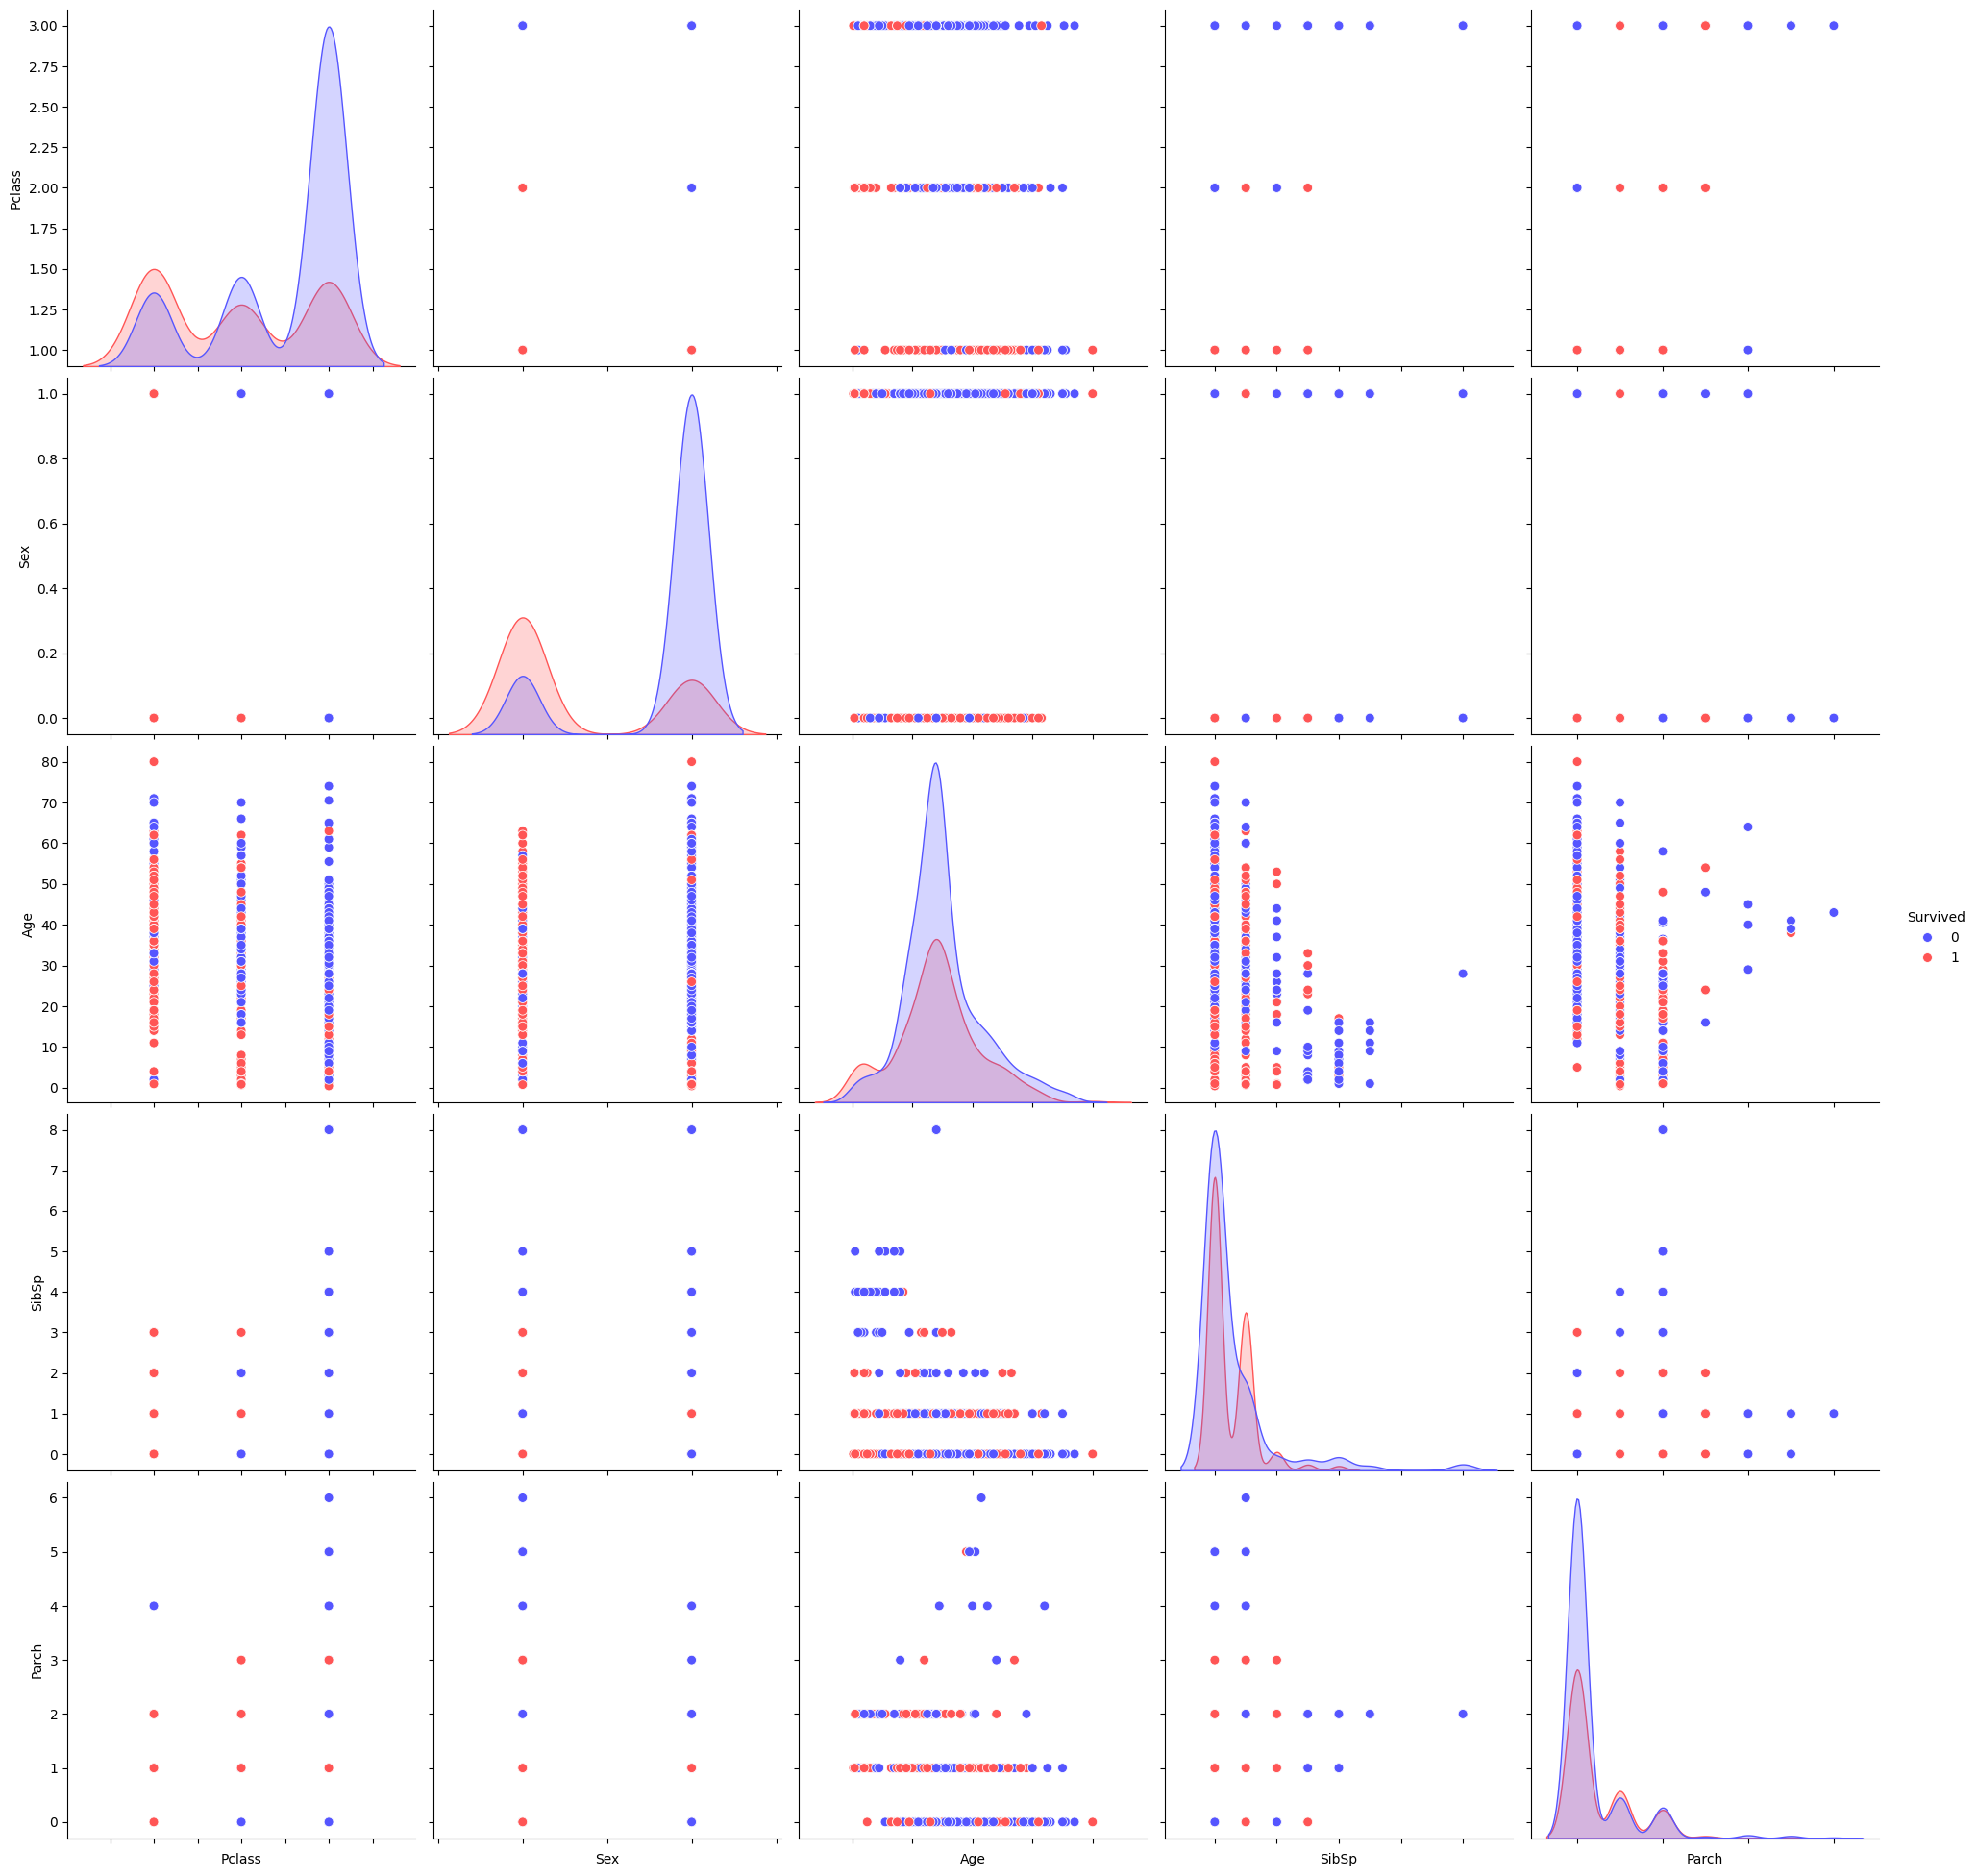

In [ ]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);